In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<h1 style='color:skyblue;'>Basic linear regression example with NN</h1>

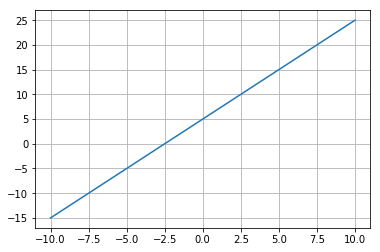

In [41]:
#make data set
x_linear = np.linspace(-10, 10, 100)

y_linear = 2 * x_linear + 5

plt.plot(x_linear, y_linear)
plt.grid(True)

In [87]:
#define random variables for predicting 
#y = mx + c
w = np.random.random()#for gradient(m) 
b = np.random.random()#for intercept(c)

# y = wx + b
# w - weights
# b - bias

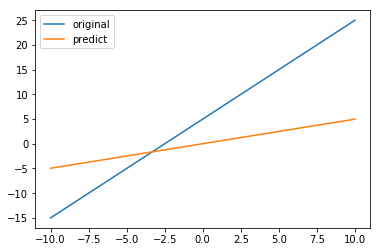

In [82]:
#define function(named "forward") for predict y for the given x
def forward(x):
    y_pred = w * x + b
    
    return y_pred

plt.plot(x_linear, y_linear)
plt.plot(x_linear, forward(x_linear))

plt.legend(['original', 'predict'])

In [83]:
#func for calculate loss(error)
def loss(x, y):
    y_pred = forward(x)
    err = (y_pred - y) ** 2
    
    return err

#calculate gradient of loss with respective to w & b
def grad(x, y):
    w_grad = 2 * x * (forward(x) - y)
    b_grad = 2 * (forward(x) - y)
    
    return w_grad, b_grad

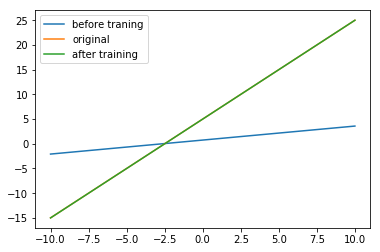

In [121]:
w = np.random.random()#for gradient(m) 
b = np.random.random()#for intercept(c)

lr = .01 #learning rate(alpha)

#for plotting
err = []
#before traning
plt.plot(x_linear, forward(x_linear))

for epoch in range(10):
    for x, y in zip(x_linear, y_linear):
        err.append(loss(x, y))
        
        w_grad, b_grad = grad(x, y)
        #update w & b using relevant values(back-propagation)
        w -= lr * w_grad
        b -= lr * b_grad

#after traning
plt.plot(x_linear, y_linear)
plt.plot(x_linear, forward(x_linear))

plt.legend(['before traning', 'original', 'after training'])

Text(0,0.5,'Cost(Error)')

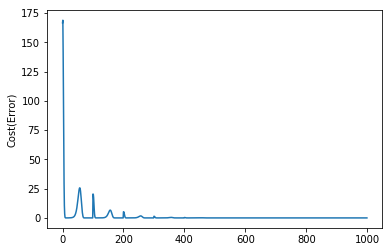

In [122]:
plt.plot(err)
plt.ylabel('Cost(Error)')

In [123]:
w

2.0005124523030378

In [124]:
b

4.994821614434336

<h1 style='color:skyblue;'>Basic logistic regression example with NN</h1>
<h2 style='color:yellowgreen;'>Predicting "logical AND" gate </h2>

In [144]:
x_in = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1]).reshape(-1, 1)

In [184]:
w = np.random.rand(1, 2)
b = np.random.random()

In [186]:
def forward(x):
    return np.dot(w, x) + b

def grad(x, y):
    w_grad = 2 * (forward(x) - y) * x
    b_grad = 2 * (forward(x) - y) 
    
    return w_grad, b_grad

In [197]:
lr = 0.1

print('Before traning')    
print(0, '-->', forward(x_in[0]))
print(0, '-->', forward(x_in[1]))
print(0, '-->', forward(x_in[2]))
print(1, '-->', forward(x_in[3]))


for epoch in range(100):
    for x, y in zip(x_in, y_and):
        w_, b_ = grad(x, y)
        w -= lr * w_
        b -= lr * b_

print('\nAfter traning')     
print(0, '-->', forward(x_in[0]))
print(0, '-->', forward(x_in[1]))
print(0, '-->', forward(x_in[2]))
print(1, '-->', forward(x_in[3]))

Before traning
0 --> [-0.3125]
0 --> [0.25]
0 --> [0.3125]
1 --> [0.875]

After traning
0 --> [-0.3125]
0 --> [0.25]
0 --> [0.3125]
1 --> [0.875]


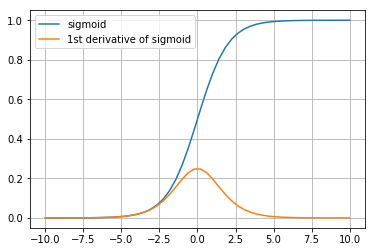

In [210]:
#To get better result have to add non-linear activation function
#here we are using "sigmoid" function
#reason is output is between 0 & 1; therefore it's suitable for binary classification like this

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def grad_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

# --------------plotting sigmoid & it's derivative--------------------------------------
x_val = np.linspace(-10, 10)
plt.plot(x_val, sigmoid(x_val))
plt.plot(x_val, grad_sigmoid(x_val))

plt.legend(['sigmoid', '1st derivative of sigmoid'])
plt.grid(True)

In [220]:
def forward(x):
    return np.dot(w, x) + b

#define forward propagtion func
def forward_pro(x):
    y_pred = forward(x)
    
    return sigmoid(y_pred)

def loss(x, y):
    return np.square(forward_pro(x) - y)

#cal gradient
def grad(x, y):
    w_grad = 2 * (forward_pro(x) - y) * x *  grad_sigmoid(forward(x))
    b_grad = 2 * (forward_pro(x) - y) *  grad_sigmoid(forward(x))
    
    return w_grad, b_grad

In [255]:
x_in = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1]).reshape(-1, 1)

w = np.random.rand(1, 2)
b = np.random.random()

In [256]:
#for plotting
cost = []

lr = 0.1

print('Before traning')    
print(0, '-->', forward_pro(x_in[0]))
print(0, '-->', forward_pro(x_in[1]))
print(0, '-->', forward_pro(x_in[2]))
print(1, '-->', forward_pro(x_in[3]))


for epoch in range(3000):
    for x, y in zip(x_in, y_and):
        cost.append(loss(x, y))

        w_, b_ = grad(x, y)
        w -= lr * w_
        b -= lr * b_

print('\nAfter traning')     
print(0, '-->', forward_pro(x_in[0]))
print(0, '-->', forward_pro(x_in[1]))
print(0, '-->', forward_pro(x_in[2]))
print(1, '-->', forward_pro(x_in[3]))

Before traning
0 --> [0.64220586]
0 --> [0.72446414]
0 --> [0.77920497]
1 --> [0.83791594]

After traning
0 --> [0.0006047]
0 --> [0.07357342]
0 --> [0.07365873]
1 --> [0.91256183]


Text(0,0.5,'Cost(Error)')

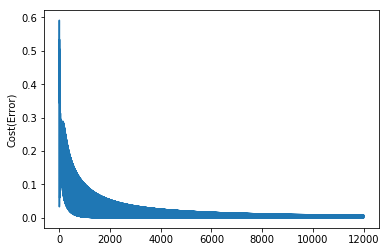

In [257]:
plt.plot(cost)
plt.ylabel('Cost(Error)')